MSE value: 0.014107245337511952


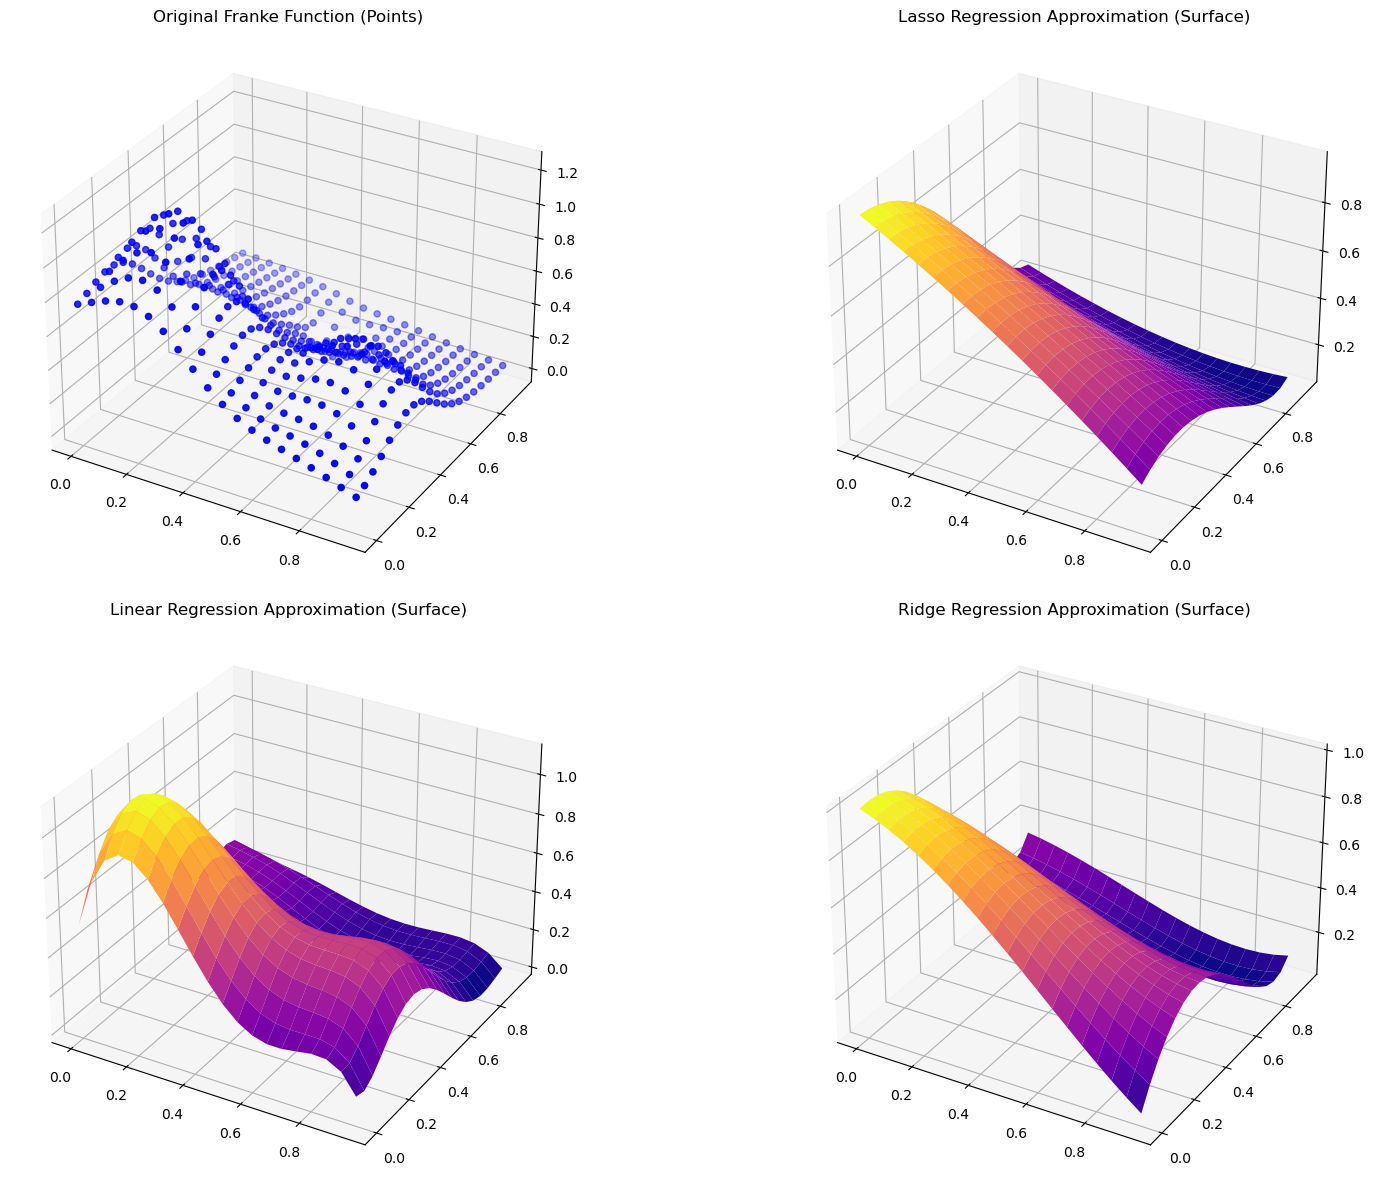

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Define the Franke Function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4

# Make data
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)

# Calculate Franke function values
z = FrankeFunction(x, y)

# Flatten the arrays for linear regression
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

# Design matrix with interaction terms up to the 5th degree
X = np.zeros((x_flat.shape[0], 21))
X[:, 0] = 1.0               # Intercept
X[:, 1] = x_flat            # Linear term for x
X[:, 2] = y_flat            # Linear term for y
X[:, 3] = x_flat ** 2       # Quadratic term x^2
X[:, 4] = y_flat ** 2       # Quadratic term y^2
X[:, 5] = x_flat * y_flat   # Interaction term xy
X[:, 6] = x_flat ** 3       # Cubic term x^3
X[:, 7] = y_flat ** 3       # Cubic term y^3
X[:, 8] = x_flat ** 2 * y_flat   # Interaction term x^2 * y
X[:, 9] = x_flat * y_flat ** 2   # Interaction term x * y^2
X[:, 10] = x_flat ** 4      # Quartic term x^4
X[:, 11] = y_flat ** 4      # Quartic term y^4
X[:, 12] = x_flat ** 3 * y_flat  # Interaction term x^3 * y
X[:, 13] = x_flat ** 2 * y_flat ** 2 # Interaction term x^2 * y^2
X[:, 14] = x_flat * y_flat ** 3  # Interaction term x * y^3
X[:, 15] = x_flat ** 5      # Quintic term x^5
X[:, 16] = y_flat ** 5      # Quintic term y^5
X[:, 17] = x_flat ** 4 * y_flat  # Interaction term x^4 * y
X[:, 18] = x_flat ** 3 * y_flat ** 2 # Interaction term x^3 * y^2
X[:, 19] = x_flat ** 2 * y_flat ** 3 # Interaction term x^2 * y^3
X[:, 20] = x_flat * y_flat ** 4  # Interaction term x * y^4

# Fit regression models
reg = linear_model.Lasso(max_iter=1000000, alpha=0.001)
reg.fit(X, z_flat)  
beta_hat = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(z_flat)
ridge_reg = linear_model.Ridge(alpha=0.1)  
ridge_reg.fit(X, z_flat)

# Predict z values using the fitted model
z_pred_lasso = reg.predict(X)
z_pred = X.dot(beta_hat)
z_pred_ridge = ridge_reg.predict(X)

# Reshape z_pred_lasso to 2D for plotting
z_pred_lasso = z_pred_lasso.reshape(x.shape)
z_pred = z_pred.reshape(x.shape)
z_pred_ridge = z_pred_ridge.reshape(x.shape)


fig = plt.figure(figsize=(18, 12))

ax = fig.add_subplot(221, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_title('Original Franke Function (Points)')


ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(x, y, z_pred_lasso, cmap='plasma', edgecolor='none')
ax2.set_title('Lasso Regression Approximation (Surface)')


ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(x, y, z_pred, cmap='plasma', edgecolor='none')
ax3.set_title('Linear Regression Approximation (Surface)')


ax3 = fig.add_subplot(224, projection='3d')
ax3.plot_surface(x, y, z_pred_ridge, cmap='plasma', edgecolor='none')
ax3.set_title('Ridge Regression Approximation (Surface)')


plt.tight_layout()  
plt.show()
